# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('data/human_body_temperature.csv')

In [2]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [3]:
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


### 1.  Is the distribution of body temperatures normal? 

Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.

We will look at the PDF and the ECDF of our data and compare it to the PDF and ECDF of a normal distribution computed with our mean and standard deviation from our data.

In [4]:
n = len(df['temperature'])
x_bar = np.mean(df['temperature'])
s = np.std(df['temperature'])
print('Mean temperature = ', x_bar, 'deg. F +/- ', s, 'deg. F')

Mean temperature =  98.24923076923078 deg. F +/-  0.7303577789050377 deg. F


In [5]:
samples_normal = np.random.normal(x_bar, s, size=10000)

In [6]:
def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1) / n
    return x, y

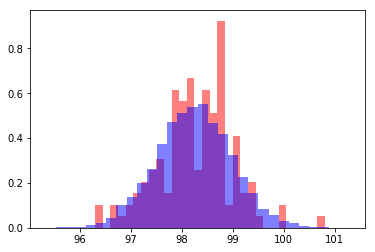

In [7]:
plt.hist(df['temperature'], bins=30, normed=True, color='red', alpha=0.5);
plt.hist(samples_normal, bins=30, normed=True, color='blue', alpha=0.5);

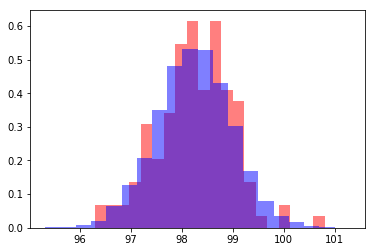

In [8]:
plt.hist(df['temperature'], bins=20, normed=True, color='red', alpha=0.5);
plt.hist(samples_normal, bins=20, normed=True, color='blue', alpha=0.5);

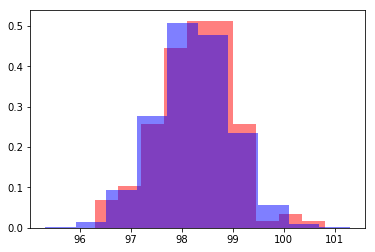

In [9]:
plt.hist(df['temperature'], bins=10, normed=True, color='red', alpha=0.5);
plt.hist(samples_normal, bins=10, normed=True, color='blue', alpha=0.5);

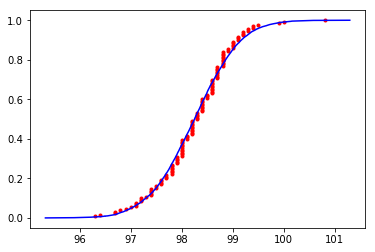

In [10]:
x_normal, y_normal = ecdf(samples_normal)
x_data, y_data = ecdf(df['temperature'])
plt.plot(x_data, y_data, marker='.', linestyle='none', color='red');
plt.plot(x_normal, y_normal, color='blue');

Looking at our PDFs and ECDFs, we can say that our distribution of body temperatures closely resembles a normal distribution.

### 2. Is the sample size large? Are the observations independent?

Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.

The sample size, $n=130$, is large since $n > 30$. Our observations are independent because the readings taken from any given person will not influence the readings taken from any other person.

### 3. Is the true population mean really 98.6 degrees F?

Would you use a one-sample or two-sample test? Why?

In this situation, is it appropriate to use the $t$ or $z$ statistic? 

Now try using the other test. How is the result be different? Why?

I was not sure here how to answer the one-sample or two-sample test question, nor do I know anything about the *t* and *z* statistics. I am, however, familiar with bootstrap replicates and can use bootstrapping to find a p-value.

In [11]:
def draw_bs_reps(data, func, size=1):
    bs_reps = np.empty(size)
    for i in range(size):
        bs_reps[i] = func(np.random.choice(data, size=len(data)))
    return bs_reps

In [12]:
mu = 98.6
temp = df['temperature']

bs_temp_reps = draw_bs_reps(temp, np.mean, size=10000)
p_val = np.sum(bs_temp_reps >= mu)/len(bs_temp_reps)
print(p_val)

0.0


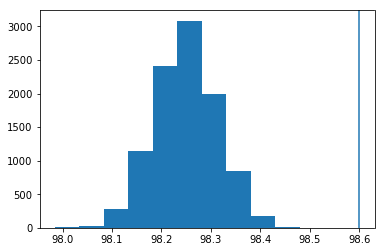

In [13]:
plt.hist(bs_temp_reps, bins=10);
plt.axvline(mu);

As our p-value and histogram indicate, the assumption that the average human body temperature is 98.6 degrees F is incorrect.

### 4. Draw a small sample of size 10 from the data and repeat both tests. 

Which one is the correct one to use? 

What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?

Once again, I am unfamiliar with the *t* and *z* statistics, so I cannot repeat the tests. 

### 5. At what temperature should we consider someone's temperature to be "abnormal"?

Start by computing the margin of error and confidence interval.

I am unfamiliar with margin of error, but I can give a confidence interval:

In [14]:
np.percentile(df['temperature'], [2.5, 97.5])

array([ 96.7225,  99.4775])

### 6. Is there a significant difference between males and females in normal temperature?

What test did you use and why?

Write a story with your conclusion in the context of the original problem.

We will start with observing the PDF and ECDF of the data separated by gender.

In [15]:
males = df[df['gender'] == 'M']
print('Males')
males['temperature'].describe()

Males


count    65.000000
mean     98.104615
std       0.698756
min      96.300000
25%      97.600000
50%      98.100000
75%      98.600000
max      99.500000
Name: temperature, dtype: float64

In [16]:
females = df[df['gender'] == 'F']
print('Females')
females['temperature'].describe()

Females


count     65.000000
mean      98.393846
std        0.743488
min       96.400000
25%       98.000000
50%       98.400000
75%       98.800000
max      100.800000
Name: temperature, dtype: float64

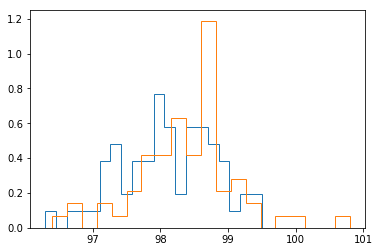

In [17]:
plt.hist(males['temperature'], bins=20, normed=True, histtype='step');
plt.hist(females['temperature'], bins=20, normed=True, histtype='step');

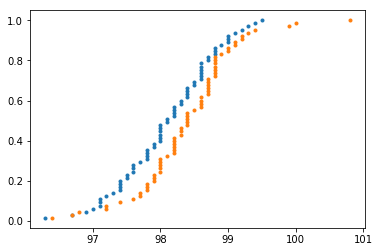

In [18]:
x_male, y_male = ecdf(males['temperature'])
x_female, y_female = ecdf(females['temperature'])
plt.plot(x_male, y_male, marker='.', linestyle='none');
plt.plot(x_female, y_female, marker='.', linestyle='none');

It seems as though the average female body temperature is higher than the average male body temperature. To test the significance of this difference, we will create permutation replicates to find a p-value.

In [19]:
diff_actual = np.mean(females['temperature']) - np.mean(males['temperature'])
perm_reps = np.empty(10000)
for i in range(len(perm_reps)):
    both = np.concatenate((females['temperature'], males['temperature']))
    both_perm = np.random.permutation(both)
    perm_males = both_perm[:len(males)]
    perm_females = both_perm[len(males):]
    perm_reps[i] = np.mean(perm_females) - np.mean(perm_males)
    
p_val = np.sum(abs(perm_reps) >= abs(diff_actual)) / len(perm_reps)

print('Diff. of means: ', diff_actual, 'deg. F')
print('p-value: ', p_val)

Diff. of means:  0.289230769230727 deg. F
p-value:  0.0246


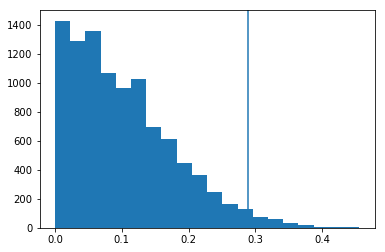

In [20]:
plt.hist(np.abs(perm_reps), bins=20);
plt.axvline(diff_actual);

The above graph and p-value suggest that out of our 10000 permutations, only 246 of them resulted in a difference in averages as high as our actual difference in averages. Therefore, we can safely conclude that the difference is indeed significant. 